# SKLearn and Support Vector Machines (Continued)

## Outline
 - [Hinge Loss Plot](#hinge)
 - [Simulating Your Own Data](#sim)
 - [Building a SVM Model](#build)
 - [Investigating Test/Train Splits](#plot)

***

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
#import sklearn packages
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from IPython.display import Image
from IPython.core.display import HTML 

## Hinge Loss Plot  <a id='hinge'> </a>

Recall that the hinge loss is given by

$$
\ell(t) = \max(0, 1-y \cdot t).
$$

We will now plot this loss function as $t$ varies. Let's assume $y = 1.$

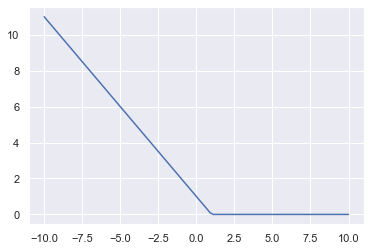

In [27]:
# Method 1: Create a vector of Zeros and compare to t
n = 100 # n is the number of elements to compare
z = np.zeros(n)
t = np.linspace(-10,10,n)  # t is linearly spaced from -10 to 10 with n elements

# compare z and t using axis = 0 (which means compare by rows)
loss = np.max([z,1-t], axis=0)

plt.plot(t,loss)
plt.show()

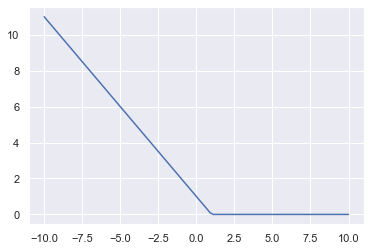

In [29]:
# Method 2: Calculate max(0, 1-t) in a for loop
n = 100 # n is the number of elements to compare
t = np.linspace(-10,10,n) # t is linearly spaced from -10 to 10 with n elements
loss2 = np.zeros(n)

def hinge(t,y):
    return max(0,1-y*t)

for i in range(n):
    # here we assume y = 1
    loss2[i] = hinge(t[i],1)

plt.plot(t,loss2)
plt.show()

## Simulating Data  <a id='sim'> </a>

<b> Below, </b> I get you started on the linear separation data. You still have to save it as a `pandas` dataframe.

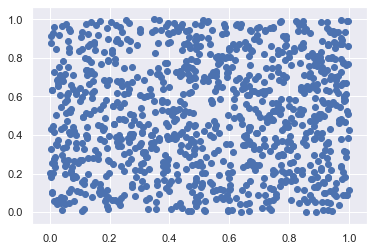

In [31]:
# Linear Separation - Method 1
num = 1000 # set the number of observations
x1 = np.random.rand(num)
x2 = np.random.rand(num)

# create empty y vector (which will hold the class values)
y = np.zeros(num)

# plot current x1,x2 pairs
plt.scatter(x1,x2)

# Now choose a linear separation and assign y = 1 if it is above
# the line and y = -1 if it is below
# (hint: you will need one for loop and if statement)

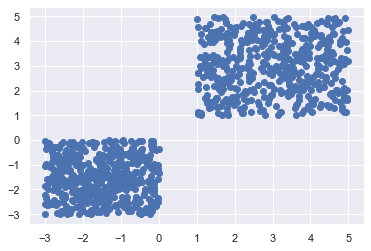

In [78]:
# Linear Separation - Method 2
num = 1000 # set the number of observations
x1 = np.random.rand(num) 
x2 = np.random.rand(num)

# separate x1 and x2 by adding/subtracting a 
# multiple of x1 and x2
x1[0:500] = x1[0:500] + 3*x1[0:500] + 1
x2[0:500] = x2[0:500] + 3*x2[0:500] + 1
x1[500:] = x1[500:] - 4*x1[500:]
x2[500:] = x2[500:] - 4*x2[500:]


# create empty y vector (which will hold the class values)
y = np.zeros(num)

# plot current x1,x2 pairs
plt.scatter(x1,x2)

# Now choose a linear separation and assign y = 1 if it is above
# the line and y = -1 if it is below

In [36]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png", width=350,height=350)

## Building a Model  <a id='model'> </a>

With all of this in mind, let's build a support-vector classifier model for the digits data set

In [2]:
# load digits
digits = datasets.load_digits()

In [25]:
digits.data.shape

(1797, 64)

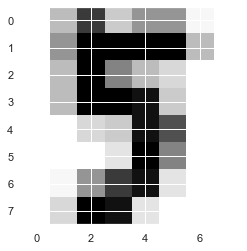

In [23]:
# explore digits data set
# we are going to use the features to predict the target
plt.imshow(digits.images[33], cmap='Greys')

In [26]:
# what are the targets?

In [41]:
# creating a training and test split
# train_test_split is a function that takes in data, targets, test size, and random state
# outputs train features, test feat., train targets, test targets 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)

In [66]:
# build a model (for more than 2 classes) 
# we will set the gamma parameter to 'scale' 
clf = svm.SVC(gamma='scale')

In [67]:
# fit the model to training data
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
# predict on test data
clf.score(X_test, y_test)

0.9865319865319865

<b> Practice! </b> Generate 3 different examples of simulated data (2 classes, 1000 observations) with $x_1$ and $x_2$ as features that satisfy the following: 
   - Linear Separation (<b> recreate the image below </b>)
   - Nonlinear Separation
   - Separation involving a circle
   
   Save each as a different `pandas` dataframe, plot the 3 examples separately (remember to save them as different variables)

<b> Practice! </b> Use SVCs on the data you previously created and note the score for each: 
   - Linear Separation (<b> recreate the image above </b>)
   - Nonlinear Separation
   - Separation involving a circle
   
*Which score was the highest out of the 3?